# Bayesi lineáris regresszió

Ennek a labornak a célja az előadáson látott egyenletekkel való ismerkedés, valamint az, hogy gyakoroljuk az egyenletek kódba való átültetését. Egyelőre nem beszélünk a kiértékelésről és a túlilleszkedés/alulilleszkedés témaköreiről.

In [2]:
%pylab inline

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


## 1. Lineáris regresszió egy dimenzióban (ML becslés)

<b>Emlékeztető.</b> Adottak az $x_i \in \mathbb{R}$ minták és a hozzájuk tartozó $y_i \in \mathbb{R}$ értékek. A célunk, hogy megállapítsuk a kettő közötti kapcsolatot, majd  egy új $x$ mintához tartozó $y$ értékre becslést adjunk. Feltesszük, hogy $x_i$ és $y_i$ között lineáris kapcsolat áll fent, egy $\beta$ precizitású normál zajjal terhelve:

\begin{align}
y_i &= w \cdot x_i + b + \varepsilon, \\
\varepsilon &\sim \mathcal{N}\left(\varepsilon \mid 0, \beta^{-1}\right).
\end{align}

Általánosításként vezessük be a $\phi: \mathbb{R} \rightarrow \mathbb{R}^2$ függvényt, amelyre

\begin{align}
\phi(x_i) = \left[1, x_i\right],
\end{align}

valamint legyen $\mathbf{w}^1 := b$, $\mathbf{w}^2 := w$, így a későbbiekben nem kell a $b$ változóval külön foglalkoznunk. Feltesszük továbbá, hogy az egyes minta-érték párok egymástól függetlenek, a likelihood tehát így írható:

\begin{align}
p\left(\mathbf{y} \mid \mathbf{x}, \mathbf{w}, \beta \right) &= \prod_i \mathcal{N}\left( y_i \mid \mathbf{w}^T \phi(x_i), \beta^{-1} \right) \\
&= \prod_i \sqrt{\frac{\beta}{2\pi}} e^{-\frac{\beta}{2} \left(y_i - \mathbf{w}^T \phi(x_i) \right)^2}.
\end{align}

Először keressünk Maximum Likelihood (ML) megoldást, azaz keressük azt a $\mathbf{w}$ vektort, amellyel a lehető legjobban "magyarázza" a megfigyelt kapcsolatot a minták és az értékek között. Másképpen, az iménti valószínűséget szeretnénk maximalizálni $\mathbf{w}$ szerint.

Vegyünk először negatív logaritmust. A logaritmusfüggvény szigorúan monoton, tehát a maximum helyét nem befolyásolja. A negatív előjel miatt most maximalizálás helyett minimalizálást fogunk végezni. Most tehát

\begin{align}
L(\mathbf{w}) := \ln p\left(\mathbf{y} \mid \mathbf{x}, \mathbf{w}, \beta \right) = \frac{\beta}{2} \sum_i \left(y_i - \mathbf{w}^T\phi(x_i)\right)^2 + const,
\end{align}
ahol az összes olyan tagot, amelyekben nincs $\mathbf{w}$, egyetlen konstansba gyűjtöttünk (ez a maximum helyét nyilván nem befolyásolja). Látjuk, hogy valójában a négyzetes hibát szeretnénk minimalizálni a valódi $y$ és a $\mathbf{w}^T\phi(x_i)$ becslésünk között. A minimum meghatározásához gradienst számítunk $\mathbf{w}$ szerint, majd ezt $0$-ra állítjuk:

\begin{align}
\nabla_{\mathbf{w}} L &= -\beta \sum_i \left(y_i - \mathbf{w}^T\phi(x_i)\right) \phi(x_i) = 0, \\
&\quad \Rightarrow \sum_i y_i \phi(x_i) - \sum_i \left(\mathbf{w}^T\phi(x_i)\right) \phi(x_i) = 0, \\
&\quad \Rightarrow \mathbf{\Phi}^T \mathbf{y} - \mathbf{\Phi}^T\mathbf{\Phi}\mathbf{w} = 0, \\
&\quad \Rightarrow \mathbf{w} = \left(\mathbf{\Phi}^T\mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^T \mathbf{y},
\end{align}

ahol a $\mathbf{\Phi}$ mátrix a $\phi(x_i)$ transzformált mintákat tartalmazza. Megvannak tehát a paraméterek, amelyek a hibát minimalizálják.

<b>1.1. feladat.</b> Tetszőleges (de nem triviális) paraméterekkel generáljon egy normál zajjal terhelt lineáris mintahalmazt, majd plottolja ki!

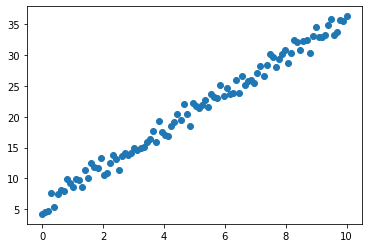

In [4]:
n  = 100
nt = 1000
x = np.linspace(0,10,n)
xt = np.linspace(-5,10,nt)
y = 3*x + 6 + np.random.randn(n)

scatter(x,y)

<b>1.2. feladat.</b> Hozza létre a $\mathbf{\Phi}$ mátrixot, amely soraiban a transzformált mintákat tartalmazza.

In [5]:
Φ = np.vstack([np.ones(n),x]).T
Φt = np.vstack([np.ones(nt),xt]).T

<b>1.3. feladat.</b> Számítsa ki a maximum likelihood becslést $\mathbf{w}$-re, majd plottolja az adatokat és az így illesztett egyenest.

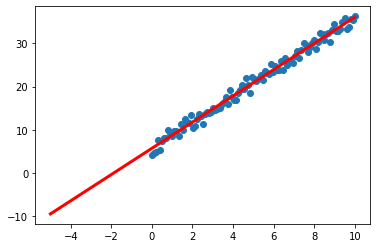

In [6]:
w = np.linalg.solve(Φ.T @ Φ, Φ.T@y)
scatter(x,y)
plot(xt, Φt@w, c="red", lw=3)

Nemlineáris regressziót úgy végezhetünk, ha $\phi$-t egy bővebb függvényosztályból választjuk. Erre úgy is gondolhatunk, hogy a $\phi: \mathbb{R} \rightarrow \mathbb{R}^k$ függvény az eredeti $x_i$ mintákat egy magasabb, $k$ dimenziós térbe transzformálja, ahol a lineáris regresszió könnyebben megvalósítható. Az eredeti térben ez nemlineáris függvényillesztésnek felel meg.

<b>1.4. feladat.</b> A Gauss RBF függvény a következőképpen írható:

\begin{align}
RBF(x_1,x_2) = e^{-\gamma \left\|x_1-x_2\right\|^2} .
\end{align}

Generáljon egy nemlineáris összefüggésből származó mintahalmazt, majd ismételje meg az illesztést olyan $\mathbf{\Phi}$ mátrixszal, amelynek $i.$ sora a $\left[k(x_i,b_1), k(x_i,b_2), \dots, k(x_i,b_n) \right]$ elemeket tartalmazza, ahol $b_i$-k egyenletesen oszlanak el az adathalmaz mentén. <b>Variálja $n$-t és a $\gamma$ paramétert, dokumentálja, hogy mit tapasztalt.</b>

In [7]:
n  = 100
nt = 1000
x = np.concatenate([np.linspace(0,4,n//2), np.linspace(6,10,n//2)])
xt = np.linspace(0,10,nt)
y = np.sinc(x) + np.random.randn(n)*0.05

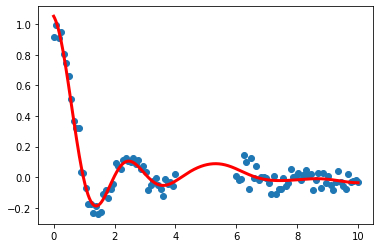

In [9]:
m = 10
b = np.linspace(0, 10, m)

γ = 1.0
Φ = np.exp(-γ * np.subtract.outer(x,b) ** 2)
w = np.linalg.solve(Φ.T @ Φ, Φ.T@y)

Φt = np.exp(-γ * np.subtract.outer(xt,b) ** 2)

scatter(x, y)
plot(xt, Φt@w, c="red", lw=3)

magyarázat.

## Lineáris regresszió egy dimenzióban (teljesen bayesi megközelítés)

A MAP becslést láttuk az előadáson, ahol megkaptuk $\mathbf{w}$ poszterior eloszlását:
\begin{align}
p\left(\mathbf{w} \mid \mathbf{x}, \mathbf{y}, \beta, \alpha \right) \propto p\left(\mathbf{y} \mid \mathbf{x}, \mathbf{w}, \beta \right) p\left( \mathbf{w} \mid \alpha \right).
\end{align}

Most pedig megnézzük a teljesen bayesi megközelítést. Ehhez az alábbi integrált kell kiszámolni, amit itt nem teszünk meg (hosszú, a Bishop-könyvben benne van):
\begin{align}
p\left(y_{\text{új}} \mid x_{\text{új}},\mathbf{x},\mathbf{y},\beta,\alpha\right) = \int p\left(y_{\text{új}} \mid x_{\text{új}}, \mathbf{w}, \beta \right) p\left(\mathbf{w} \mid \mathbf{x}, \mathbf{y}, \beta, \alpha \right) d\mathbf{w} .
\end{align}

A prediktív eloszlás a következőnek adódik:

\begin{align}
p\left(y_{\text{új}} \mid x_{\text{új}},\mathbf{x},\mathbf{y},\beta,\alpha \right) &= \mathcal{N} \left( y \mid \mu, \sigma^2 \right), \\
\sigma^2 &= \frac{1}{\beta} + \phi(x_{\text{új}})^T \mathbf{\Sigma} \phi(x_{\text{új}}), \\
\mu &= \phi(x_{\text{új}})^T \mathbf{\Psi}, \\
\mathbf{\Sigma} &= \left(\beta \mathbf{\Phi}^T\mathbf{\Phi} + \alpha\mathbf{I} \right)^{-1}, \\
\mathbf{\Psi} &= \mathbf{\Sigma}\left(\beta \mathbf{\Phi}^T \mathbf{y} \right).
\end{align}

<b>2. feladat.</b> Végezze el a teljes bayesi becslést a fenti egyenleteket felhasználva, a legutóbbi adathalmazra Gauss RBF bázisfüggvénnyel. Foglalja össze az $\alpha$, $\beta$, $\gamma$ és $n$ paraméterek hatását az eredményekre. A ploton tüntesse fel a szórást is (pl. `fill_between` függvény).

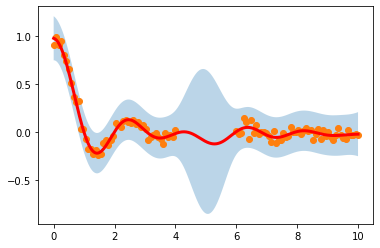

In [10]:
β,α = 100,1.
γ = 1.0
m = 20

b = np.linspace(0, 10, m)
Φ = np.exp(-γ * np.subtract.outer(x, b) ** 2)
Φt = np.exp(-γ * np.subtract.outer(xt, b) ** 2)

Σ = β*Φ.T@Φ + α*eye(m)
Ψ = np.linalg.solve(Σ, β*Φ.T@y)

μ = Φt@Ψ
σ = np.sqrt(1/β + np.sum(Φt.T*np.linalg.solve(Σ,Φt.T),axis=0))

plot(xt, μ, c="red" ,lw=3)
fill_between(xt, μ - 2 * σ, μ + 2 * σ, alpha=0.3)
scatter(x,y)

## Lineáris regresszió valós adathalmazon, több dimenzióban

<b>3. feladat.</b> Futtassa a következő blokkot egy teszt adathalmaz betöltéséhez, és egy referencia-algoritmus futtatásához. Az RMSE (root mean squared error) függvénnyel az illeszkedés mértékét jellemezhetjük. Futtassa a saját algoritmusát is, hasonlítsa össze az illeszkedést. Helyes implementációnál a két szám közel esik egymáshoz.

In [3]:
def rmse(y,pred):
    return np.sqrt(np.mean((y-pred)**2))

data = load_diabetes()
x,y  = data['data'], data['target']

print("RMSE = {:.3f}".format(rmse(y, LinearRegression().fit(x, y).predict(x))))

RMSE = 53.476


In [5]:
Phi = np.insert(x, 0, 1, axis=1)
w = np.linalg.solve(Phi.T @ Phi, Phi.T@y)
print("RMSE = {:.3f}".format(rmse(y, Phi@w)))

RMSE = 53.476


<b>Szorgalmi.</b> Konstruáljon olyan $\phi$ függvényt ($\mathbf{\Phi}$ mátrixot), amellyel jobb illeszkedés érhető el (pl. a polinomiális vagy Gauss RBF bázisfüggvények többdimenziós analógjait).